In [94]:
import os

IMG_DIR = "images"
os.makedirs(IMG_DIR, exist_ok=True)

print("Working dir:", os.getcwd())
print("Images dir exists:", os.path.isdir(IMG_DIR))
print("Images currently:", os.listdir(IMG_DIR))

Working dir: /content
Images dir exists: True
Images currently: ['sales_by_location.png', 'monthly_sales.png']


In [95]:
import pandas as pd

file_path = '/content/drive/MyDrive/coffee-shop-sales-revenue.csv'

df = pd.read_csv(file_path, sep="|")

df.head(10)


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
5,6,2023-01-01,07:22:41,1,5,Lower Manhattan,77,3.00,Bakery,Scone,Oatmeal Scone
6,7,2023-01-01,07:25:49,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
7,8,2023-01-01,07:33:34,2,5,Lower Manhattan,28,2.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm
8,9,2023-01-01,07:39:13,1,5,Lower Manhattan,39,4.25,Coffee,Barista Espresso,Latte Rg
9,10,2023-01-01,07:39:34,2,5,Lower Manhattan,58,3.50,Drinking Chocolate,Hot chocolate,Dark chocolate Rg


In [96]:
# Check shape (rows, columns)
print("Rows, Columns:", df.shape)

# Check data types & nulls
print("\nInfo:")
print(df.info())

# Quick summary stats (numeric cols only)
print("\nSummary Stats:")
print(df.describe())

# Count missing values per column
print("\nMissing Values:")
print(df.isnull().sum())

Rows, Columns: (149116, 11)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB
None

Summary Stats:
       transaction_id  transaction_qty       store_id     product_id  \
count   149116.000000    149116.000000  149116.000000  149116.000000   
me

In [97]:
# Drop irrelevant IDs
df.drop(columns=["store_id", "product_id"], inplace=True)

# Rename columns
df.rename(columns={
    'transaction_id': 'id',
    'transaction_date': 'date',
    'transaction_time': 'time',
    'transaction_qty': 'quantity',
    'store_location': 'location',
    'product_category': 'category',
    'product_type': 'product',
    'product_detail': 'detail'
}, inplace=True)

df.head()

,id,date,time,quantity,location,unit_price,category,product,detail
0,1,2023-01-01,07:06:11,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,Lower Manhattan,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [98]:
# converting date to datetime
df['date'] = pd.to_datetime(df['date'])
# sales
df['sales'] = df['quantity'] * df['unit_price']
# extract the month as a full name
df['month'] = df['date'].dt.strftime('%B')
# extract the day and year
df['day'] = df['date'].dt.day
df['year'] = df['date'].dt.year
# get the weekday name
df['weekday'] = df['date'].dt.day_name()
# extracting the hour from time
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour
# defining the time of the day
def get_time_of_day(hour):
    if hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'
df['time_of_day'] = df['hour'].apply(get_time_of_day)

In [99]:
df.head()

,id,date,time,quantity,location,unit_price,category,product,detail,sales,month,day,year,weekday,hour,time_of_day
0,1,2023-01-01,07:06:11,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,January,1,2023,Sunday,7,Morning
1,2,2023-01-01,07:08:56,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,January,1,2023,Sunday,7,Morning
2,3,2023-01-01,07:14:04,2,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,January,1,2023,Sunday,7,Morning
3,4,2023-01-01,07:20:24,1,Lower Manhattan,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,January,1,2023,Sunday,7,Morning
4,5,2023-01-01,07:22:41,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,January,1,2023,Sunday,7,Morning


In [100]:
import pandas as pd

#Quick health / sanity KPIs
kpis = {
    "rows": len(df),
    "date_range": (df["date"].min().date(), df["date"].max().date()),
    "locations": df["location"].nunique(),
    "categories": df["category"].nunique(),
    "products": df["product"].nunique(),
    "details": df["detail"].nunique(),
    "total_qty": int(df["quantity"].sum()),
    "total_sales": round(df["sales"].sum(), 2),
}

avg_ticket = df.groupby("id")["sales"].sum().mean()
kpis["avg_ticket_per_transaction"] = round(avg_ticket, 2)

print("DATA HEALTH")
for k, v in kpis.items():
    print(f"{k:>28}: {v}")

top_details_sales = (
    df.groupby("detail", as_index=False)["sales"]
      .sum()
      .sort_values("sales", ascending=False)
      .head(15)
)

top_products_sales = (
    df.groupby("product", as_index=False)["sales"]
      .sum()
      .sort_values("sales", ascending=False)
      .head(15)
)

top_categories_sales = (
    df.groupby("category", as_index=False)["sales"]
      .sum()
      .sort_values("sales", ascending=False)
      .head(10)
)

top_details_qty = (
    df.groupby("detail", as_index=False)["quantity"]
      .sum()
      .sort_values("quantity", ascending=False)
      .head(15)
)


location_sales = (
    df.groupby("location", as_index=False)["sales"]
      .sum()
      .sort_values("sales", ascending=False)
)

print("TOP 15 ITEM DETAILS BY SALES")
display(top_details_sales)

print("TOP 15 PRODUCT TYPES BY SALES")
display(top_products_sales)

print("TOP 10 CATEGORIES BY SALES")
display(top_categories_sales)

print("TOP 15 ITEM DETAILS BY QUANTITY")
display(top_details_qty)

print("SALES BY LOCATION")
display(location_sales)

DATA HEALTH
                        rows: 149116
                  date_range: (datetime.date(2023, 1, 1), datetime.date(2023, 6, 30))
                   locations: 3
                  categories: 9
                    products: 29
                     details: 80
                   total_qty: 214470
                 total_sales: 698812.33
  avg_ticket_per_transaction: 4.69
TOP 15 ITEM DETAILS BY SALES


,detail,sales
75,Sustainably Grown Organic Lg,21151.75
20,Dark chocolate Lg,21006.00
48,Latte Rg,19112.25
6,Cappuccino Lg,17641.75
53,Morning Sunrise Chai Lg,17384.00
47,Latte,17257.50
43,Jamaican Coffee River Lg,16481.25
76,Sustainably Grown Organic Rg,16233.75
5,Cappuccino,15997.50
2,Brazilian Lg,15109.50


TOP 15 PRODUCT TYPES BY SALES


,product,sales
0,Barista Espresso,91406.20
4,Brewed Chai tea,77081.95
17,Hot chocolate,72416.00
13,Gourmet brewed coffee,70034.60
3,Brewed Black tea,47932.00
6,Brewed herbal tea,47539.50
25,Premium brewed coffee,38781.15
22,Organic brewed coffee,37746.50
27,Scone,36866.12
10,Drip coffee,31984.00


TOP 10 CATEGORIES BY SALES


,category,sales
2,Coffee,269952.45
8,Tea,196405.95
0,Bakery,82315.64
4,Drinking Chocolate,72416.00
3,Coffee beans,40085.25
1,Branded,13607.00
6,Loose Tea,11213.60
5,Flavours,8408.80
7,Packaged Chocolate,4407.64


TOP 15 ITEM DETAILS BY QUANTITY


,detail,quantity
24,Earl Grey Rg,4708
20,Dark chocolate Lg,4668
54,Morning Sunrise Chai Rg,4643
47,Latte,4602
64,Peppermint Rg,4564
15,Columbian Medium Roast Rg,4547
79,Traditional Blend Chai Rg,4512
48,Latte Rg,4497
60,Our Old Time Diner Blend Sm,4484
69,Serenity Green Tea Rg,4477


SALES BY LOCATION


,location,sales
1,Hell's Kitchen,236511.17
0,Astoria,232243.91
2,Lower Manhattan,230057.25


In [101]:
# Total revenue
total_revenue = df['sales'].sum()

# Total number of orders (transactions)
total_orders = df['id'].nunique()

# Average Order Value (AOV)
aov = total_revenue / total_orders

print("Overview Metrics")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Orders: {total_orders:,}")
print(f"Average Order Value (AOV): ${aov:.2f}")

Overview Metrics
Total Revenue: $698,812.33
Total Orders: 149,116
Average Order Value (AOV): $4.69


In [102]:
# Group sales by location
location_sales = df.groupby("location")["sales"].sum()

# Find peak sales location
peak_sales_location = location_sales.idxmax()
peak_sales_revenue = location_sales.max()

print(f"Peak Sales Location: {peak_sales_location}")
print(f"Revenue at Peak Location: ${peak_sales_revenue:,.2f}")

Peak Sales Location: Hell's Kitchen
Revenue at Peak Location: $236,511.17


In [103]:
# Group by year + month for proper order
monthly_sales = (
    df.groupby(df['date'].dt.to_period("M"))['sales']
      .sum()
      .reset_index()
)

# Convert period back to datetime for plotting
monthly_sales['date'] = monthly_sales['date'].dt.to_timestamp()

print(monthly_sales)

        date      sales
0 2023-01-01   81677.74
1 2023-02-01   76145.19
2 2023-03-01   98834.68
3 2023-04-01  118941.08
4 2023-05-01  156727.76
5 2023-06-01  166485.88


In [104]:
import os
os.makedirs("images", exist_ok=True)

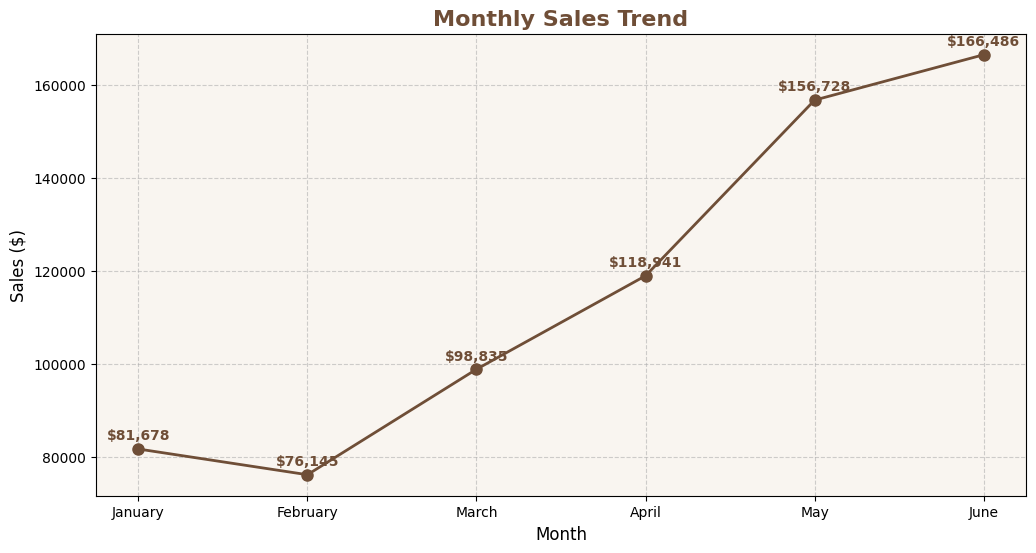

<Figure size 640x480 with 0 Axes>

PNGs found: ['images/sales_by_location.png', 'images/monthly_sales.png']


In [105]:
import matplotlib.pyplot as plt

monthly_sales['month_name'] = monthly_sales['date'].dt.strftime('%B')

coffee_brown = "#6F4E37"
latte = "#C4A484"

plt.figure(figsize=(12,6))
plt.plot(monthly_sales['month_name'], monthly_sales['sales'],
         marker='o', color=coffee_brown, linewidth=2, markersize=8)

for i, val in enumerate(monthly_sales['sales']):
    plt.text(i, val + 2000, f"${val:,.0f}",
             ha='center', fontsize=10, color=coffee_brown, fontweight='bold')

plt.title("Monthly Sales Trend", fontsize=16, fontweight='bold', color=coffee_brown)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Sales ($)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.gca().set_facecolor("#f9f5f0")

plt.show()

plt.tight_layout()
plt.savefig(os.path.join(IMG_DIR, "monthly_sales.png"), bbox_inches="tight", dpi=300)
plt.show()

# verify it saved:
from glob import glob
print("PNGs found:", glob(os.path.join(IMG_DIR, "*.png")))

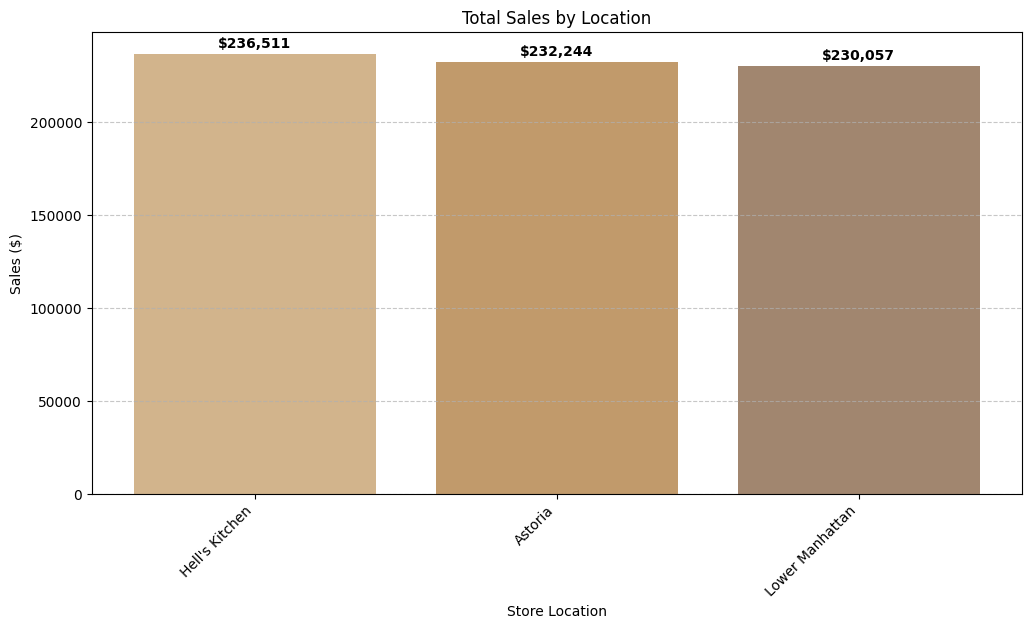

<Figure size 640x480 with 0 Axes>

PNGs found: ['images/sales_by_location.png', 'images/monthly_sales.png']


In [106]:
# Group sales by location
location_sales = df.groupby('location')['sales'].sum().reset_index()

# Sort locations by sales (descending)
location_sales = location_sales.sort_values(by='sales', ascending=False)

coffee_colors = ['#D2B48C', '#C19A6B', '#A1866F']

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
bars = plt.bar(location_sales['location'], location_sales['sales'], color=coffee_colors)

plt.title("Total Sales by Location")
plt.xlabel("Store Location")
plt.ylabel("Sales ($)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2000,
             f"${height:,.0f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()

plt.tight_layout()
plt.savefig(os.path.join(IMG_DIR, "monthly_sales.png"), bbox_inches="tight", dpi=300)
plt.show()

# verify it saved:
from glob import glob
print("PNGs found:", glob(os.path.join(IMG_DIR, "*.png")))

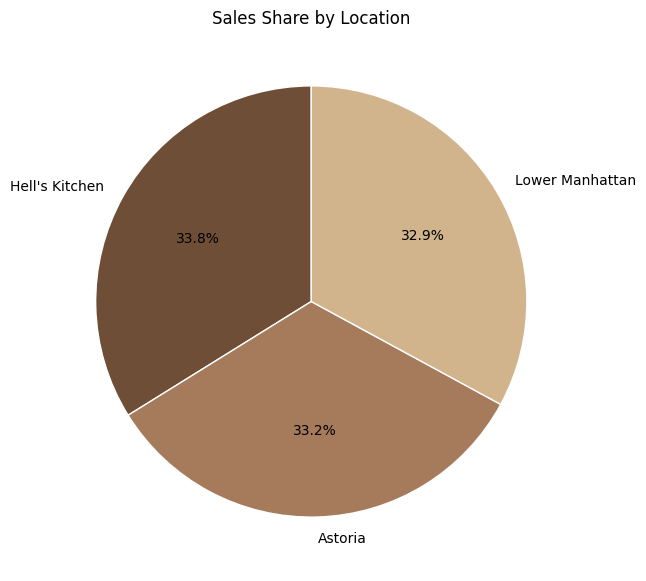

<Figure size 640x480 with 0 Axes>

PNGs found: ['images/sales_by_location.png', 'images/monthly_sales.png']


In [107]:
# Pie chart for sales share by location
plt.figure(figsize=(7,7))
plt.pie(location_sales['sales'],
        labels=location_sales['location'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['#6F4E37','#A67B5B','#D2B48C'],
        wedgeprops={'edgecolor':'white'})

plt.title("Sales Share by Location")
plt.show()

plt.tight_layout()
plt.savefig(os.path.join(IMG_DIR, "monthly_sales.png"), bbox_inches="tight", dpi=300)
plt.show()

# verify it saved:
from glob import glob
print("PNGs found:", glob(os.path.join(IMG_DIR, "*.png")))

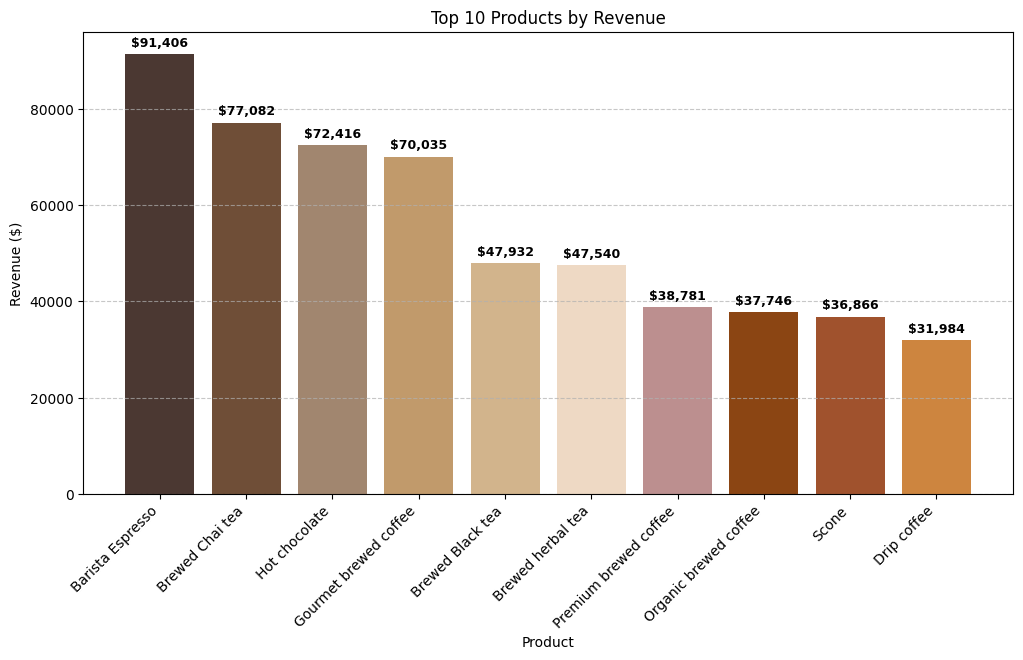

<Figure size 640x480 with 0 Axes>

PNGs found: ['images/sales_by_location.png', 'images/monthly_sales.png']


In [108]:
# Group sales by product and sum revenue
product_sales = df.groupby('product')['sales'].sum().reset_index()

top_products = product_sales.sort_values(by='sales', ascending=False).head(10)

coffee_palette = [
    '#4B3832', '#6F4E37', '#A1866F', '#C19A6B', '#D2B48C',
    '#EED9C4', '#BC8F8F', '#8B4513', '#A0522D', '#CD853F'
]

plt.figure(figsize=(12,6))
bars = plt.bar(top_products['product'], top_products['sales'], color=coffee_palette)

plt.title("Top 10 Products by Revenue")
plt.xlabel("Product")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1000,
             f"${height:,.0f}", ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.show()

plt.tight_layout()
plt.savefig(os.path.join(IMG_DIR, "monthly_sales.png"), bbox_inches="tight", dpi=300)
plt.show()

# verify it saved:
from glob import glob
print("PNGs found:", glob(os.path.join(IMG_DIR, "*.png")))

Average Order Value by Category:
category
Coffee beans          22.866657
Branded               18.215529
Loose Tea              9.267438
Packaged Chocolate     9.050595
Drinking Chocolate     6.314615
Coffee                 4.621207
Tea                    4.321458
Bakery                 3.610969
Flavours               1.238409
Name: sales, dtype: float64


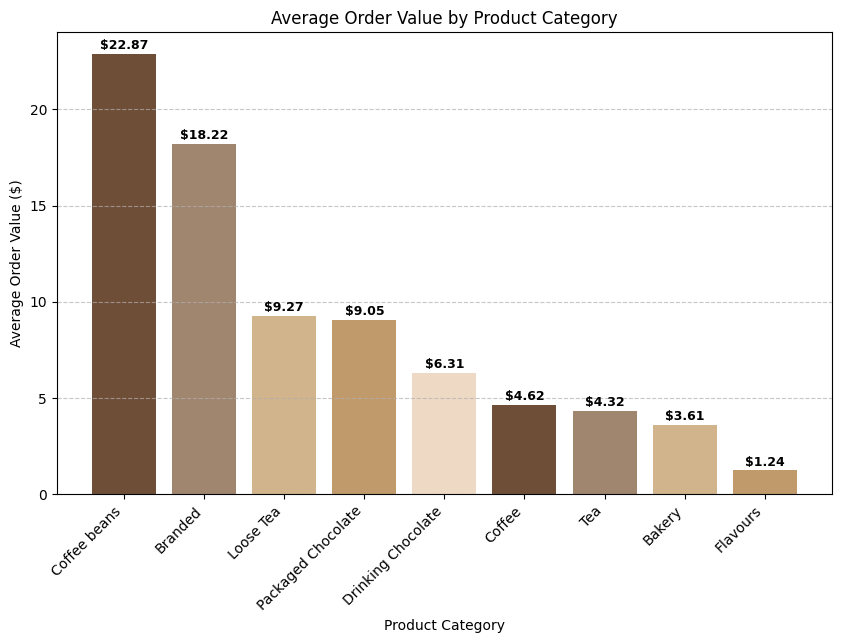

<Figure size 640x480 with 0 Axes>

PNGs found: ['images/sales_by_location.png', 'images/monthly_sales.png']


In [109]:
# Step 1: Calculate sales per transaction per category
order_category_sales = df.groupby(['id', 'category'])['sales'].sum().reset_index()

# Step 2: Average order value per category
aov_by_category = order_category_sales.groupby('category')['sales'].mean().sort_values(ascending=False)

print("Average Order Value by Category:")
print(aov_by_category)

# Step 3: Plot
coffee_palette = ['#6F4E37', '#A1866F', '#D2B48C', '#C19A6B', '#EED9C4']

plt.figure(figsize=(10,6))
bars = plt.bar(aov_by_category.index, aov_by_category.values, color=coffee_palette)

plt.title("Average Order Value by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Order Value ($)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1,
             f"${height:,.2f}", ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.show()

plt.tight_layout()
plt.savefig(os.path.join(IMG_DIR, "monthly_sales.png"), bbox_inches="tight", dpi=300)
plt.show()

# verify it saved:
from glob import glob
print("PNGs found:", glob(os.path.join(IMG_DIR, "*.png")))

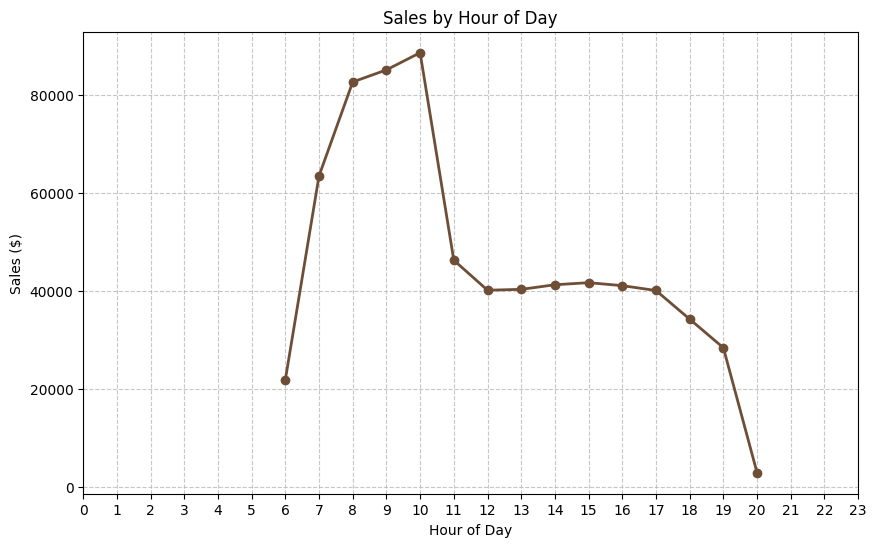

Peak: 10AM with sales at $88,673.39


<Figure size 640x480 with 0 Axes>

PNGs found: ['images/sales_by_location.png', 'images/monthly_sales.png']


In [110]:
# Group sales by hour
hourly_sales = df.groupby('hour')['sales'].sum().reset_index()

hourly_sales = hourly_sales.sort_values('hour')

plt.figure(figsize=(10,6))
plt.plot(hourly_sales['hour'], hourly_sales['sales'], marker='o', color='#6F4E37', linewidth=2)

plt.title("Sales by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Sales ($)")
plt.xticks(range(0,24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

peak_hour = hourly_sales.loc[hourly_sales['sales'].idxmax()]

hour_label = f"{int(peak_hour['hour'])}AM" if peak_hour['hour'] < 12 else \
             (f"{int(peak_hour['hour'])-12}PM" if peak_hour['hour'] > 12 else "12PM")

print(f"Peak: {hour_label} with sales at ${peak_hour['sales']:,.2f}")

plt.tight_layout()
plt.savefig(os.path.join(IMG_DIR, "monthly_sales.png"), bbox_inches="tight", dpi=300)
plt.show()

# verify it saved:
from glob import glob
print("PNGs found:", glob(os.path.join(IMG_DIR, "*.png")))

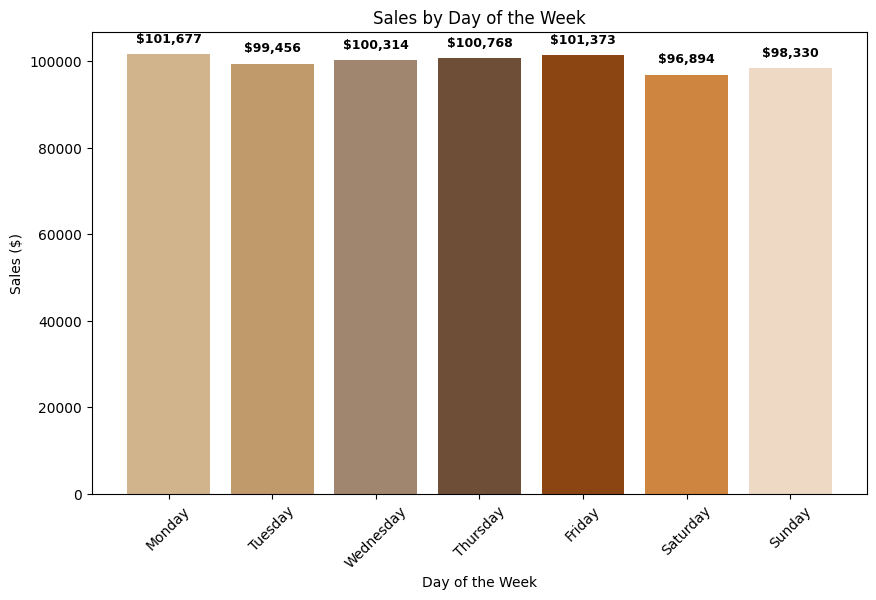

Peak Day: Monday with Sales $101,677.28


<Figure size 640x480 with 0 Axes>

PNGs found: ['images/sales_by_location.png', 'images/monthly_sales.png']


In [111]:
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

weekday_sales = df.groupby('weekday')['sales'].sum().reindex(weekday_order).reset_index()

plt.figure(figsize=(10,6))
bars = plt.bar(weekday_sales['weekday'], weekday_sales['sales'], color=['#D2B48C','#C19A6B','#A1866F','#6F4E37','#8B4513','#CD853F','#EED9C4'])

plt.title("Sales by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Sales ($)")
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2000,
             f"${height:,.0f}", ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.show()

peak_day = weekday_sales.loc[weekday_sales['sales'].idxmax()]
print(f"Peak Day: {peak_day['weekday']} with Sales ${peak_day['sales']:,.2f}")

plt.tight_layout()
plt.savefig(os.path.join(IMG_DIR, "monthly_sales.png"), bbox_inches="tight", dpi=300)
plt.show()

# verify it saved:
from glob import glob
print("PNGs found:", glob(os.path.join(IMG_DIR, "*.png")))

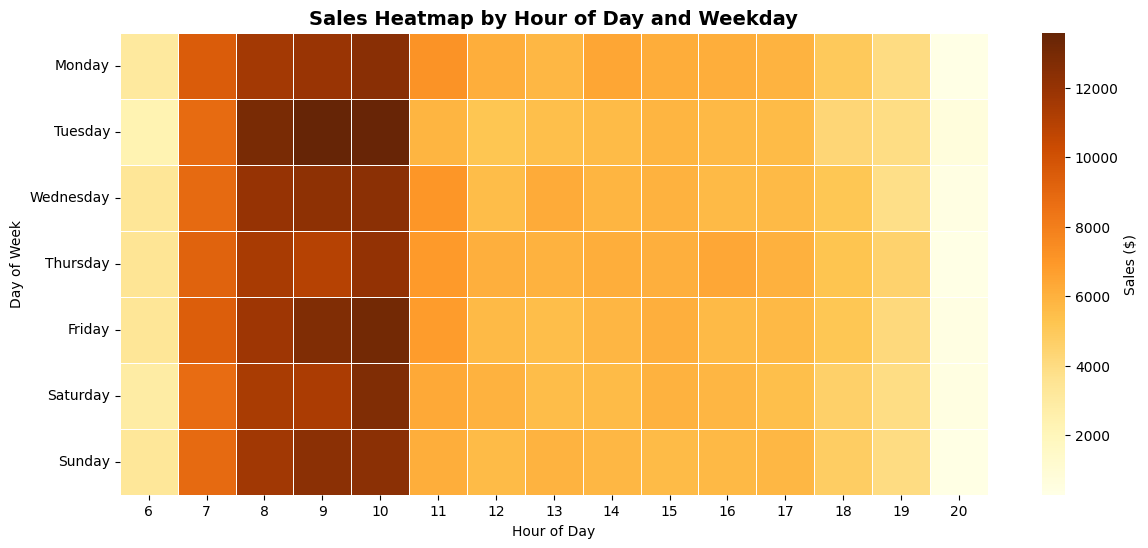

<Figure size 640x480 with 0 Axes>

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = df.groupby(['weekday','hour'])['sales'].sum().reset_index()

pivot_table = heatmap_data.pivot(index='weekday', columns='hour', values='sales')

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(weekday_order)

plt.figure(figsize=(14,6))
sns.heatmap(pivot_table, cmap="YlOrBr", linewidths=0.5, annot=False, cbar_kws={'label': 'Sales ($)'})

plt.title("Sales Heatmap by Hour of Day and Weekday", fontsize=14, weight='bold')
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

plt.tight_layout()
plt.savefig(os.path.join(IMG_DIR, "monthly_sales.png"), bbox_inches="tight", dpi=300)
plt.show()


In [113]:
import pandas as pd
import numpy as np

# Ensure datetime
df["date"] = pd.to_datetime(df["date"])

# Daily revenue (sum of line-item sales per day)
daily = (df.groupby("date", as_index=False)["sales"]
           .sum()
           .set_index("date")
           .asfreq("D")
           .fillna(0.0))  # fill missing open/closed days if any

daily.head()

,sales
date,
2023-01-01,2508.20
2023-01-02,2403.35
2023-01-03,2565.00
2023-01-04,2220.10
2023-01-05,2418.85


In [114]:
# Keep the last 30 days as a test set
train = daily.iloc[:-30].copy()
test  = daily.iloc[-30:].copy()

print(train.index.min(), "->", train.index.max())
print(test.index.min(),  "->", test.index.max())

2023-01-01 00:00:00 -> 2023-05-31 00:00:00
2023-06-01 00:00:00 -> 2023-06-30 00:00:00


Seasonal Naive  MAE: 755.68 MAPE: 13.05 %
7-day Moving Avg MAE: 874.01 MAPE: 15.11 %


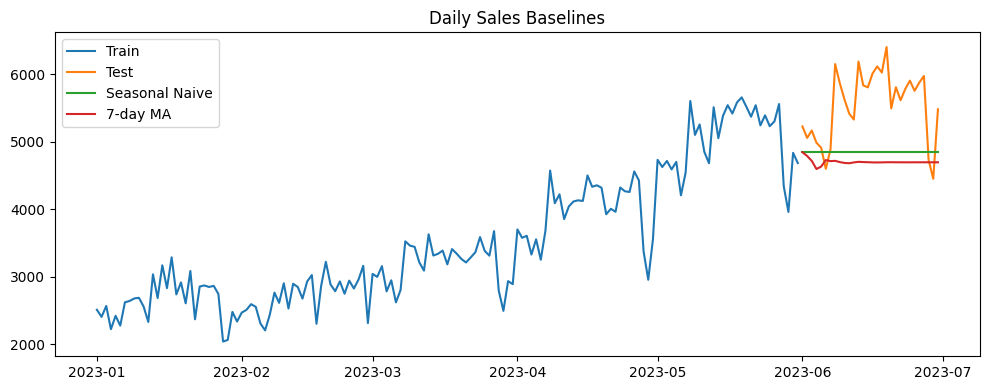

In [115]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Seasonal naive with 7-day weekly pattern
season = 7
sn_pred = train["sales"].shift(season).reindex(test.index)
# If first forecast days precede enough history, backfill with last known values
sn_pred = sn_pred.fillna(train["sales"].iloc[-season: ].mean())

# Simple moving average baseline (last 7 days)
ma_pred = []
window = 7
hist = train["sales"].tolist()
for _ in range(len(test)):
    ma_pred.append(np.mean(hist[-window:]))
    hist.append(ma_pred[-1])  # recursive MA forecast
ma_pred = pd.Series(ma_pred, index=test.index, name="ma_pred")

print("Seasonal Naive  MAE:", round(mean_absolute_error(test["sales"], sn_pred),2),
      "MAPE:", round(mean_absolute_percentage_error(test["sales"], sn_pred)*100,2), "%")
print("7-day Moving Avg MAE:", round(mean_absolute_error(test["sales"], ma_pred),2),
      "MAPE:", round(mean_absolute_percentage_error(test["sales"], ma_pred)*100,2), "%")

plt.figure(figsize=(10,4))
plt.plot(train.index, train["sales"], label="Train")
plt.plot(test.index,  test["sales"],  label="Test")
plt.plot(test.index,  sn_pred,        label="Seasonal Naive")
plt.plot(test.index,  ma_pred,        label="7-day MA")
plt.title("Daily Sales Baselines")
plt.legend(); plt.tight_layout()

In [116]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.statespace.sarimax import SARIMAX

pdq      = [(1,0,0),(0,1,1),(1,1,1)]
seasonal = [(0,1,1,7),(1,1,1,7)]

best = {"aic": np.inf, "order": None, "sorder": None, "model": None}
y = train["sales"]

for order in pdq:
    for sorder in seasonal:
        try:
            m = SARIMAX(y, order=order, seasonal_order=sorder,
                        enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)
            if m.aic < best["aic"]:
                best = {"aic": m.aic, "order": order, "sorder": sorder, "model": m}
        except Exception:
            pass

best["order"], best["sorder"], round(best["aic"],1)

((1, 1, 1), (0, 1, 1, 7), np.float64(1974.1))

SARIMA  MAE: 551.65 MAPE: 9.74 %


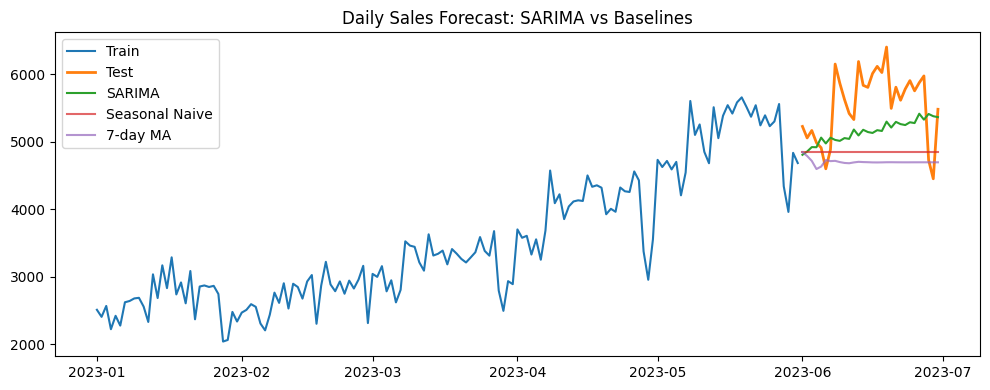

In [117]:
# Forecast the test period
sarima = best["model"]
fc_test = sarima.get_forecast(steps=len(test)).predicted_mean
print("SARIMA  MAE:", round(mean_absolute_error(test["sales"], fc_test),2),
      "MAPE:", round(mean_absolute_percentage_error(test["sales"], fc_test)*100,2), "%")

# Plot against baselines
plt.figure(figsize=(10,4))
plt.plot(train.index, train["sales"], label="Train")
plt.plot(test.index,  test["sales"],  label="Test", linewidth=2)
plt.plot(test.index,  fc_test,        label="SARIMA")
plt.plot(test.index,  sn_pred,        label="Seasonal Naive", alpha=0.7)
plt.plot(test.index,  ma_pred,        label="7-day MA", alpha=0.7)
plt.title("Daily Sales Forecast: SARIMA vs Baselines")
plt.legend(); plt.tight_layout()

In [118]:
# Refit SARIMA on full data for final forecast
final_m = SARIMAX(daily["sales"],
                  order=best["order"], seasonal_order=best["sorder"],
                  enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)

n_steps = 30
future_idx = pd.date_range(daily.index.max() + pd.Timedelta(days=1), periods=n_steps, freq="D")
fc_mean = final_m.get_forecast(steps=n_steps).predicted_mean
forecast_df = pd.DataFrame({"date": future_idx, "forecast_sales": fc_mean.values})
forecast_df.head()

,date,forecast_sales
0,2023-07-01,5587.585813
1,2023-07-02,5585.195277
2,2023-07-03,5729.186552
3,2023-07-04,5651.233868
4,2023-07-05,5687.174107


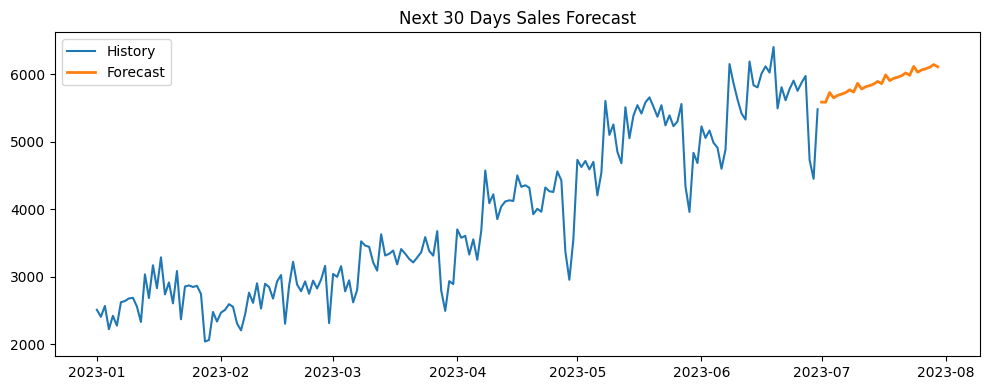

In [119]:
plt.figure(figsize=(10,4))
plt.plot(daily.index, daily["sales"], label="History")
plt.plot(forecast_df["date"], forecast_df["forecast_sales"], label="Forecast", linewidth=2)
plt.title("Next 30 Days Sales Forecast")
plt.legend(); plt.tight_layout()

In [120]:
last_7  = daily["sales"].tail(7).mean()
next_7  = forecast_df["forecast_sales"].head(7).mean()
delta   = (next_7 - last_7) / max(1e-9, last_7) * 100

summary = {
    "Expected next-7-day revenue": f"${next_7:,.0f}/day avg",
    "Change vs last 7 days": f"{delta:+.1f}%",
    "Peak forecasted day (next 30)": f"{forecast_df.iloc[forecast_df['forecast_sales'].idxmax()].date.date()}",
}
summary

{'Expected next-7-day revenue': '$5,668/day avg',
 'Change vs last 7 days': '+3.9%',
 'Peak forecasted day (next 30)': '2023-07-29'}